In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image, PngImagePlugin


In [8]:
img_path = "temp_patch_output/MSB-03700-01-01"

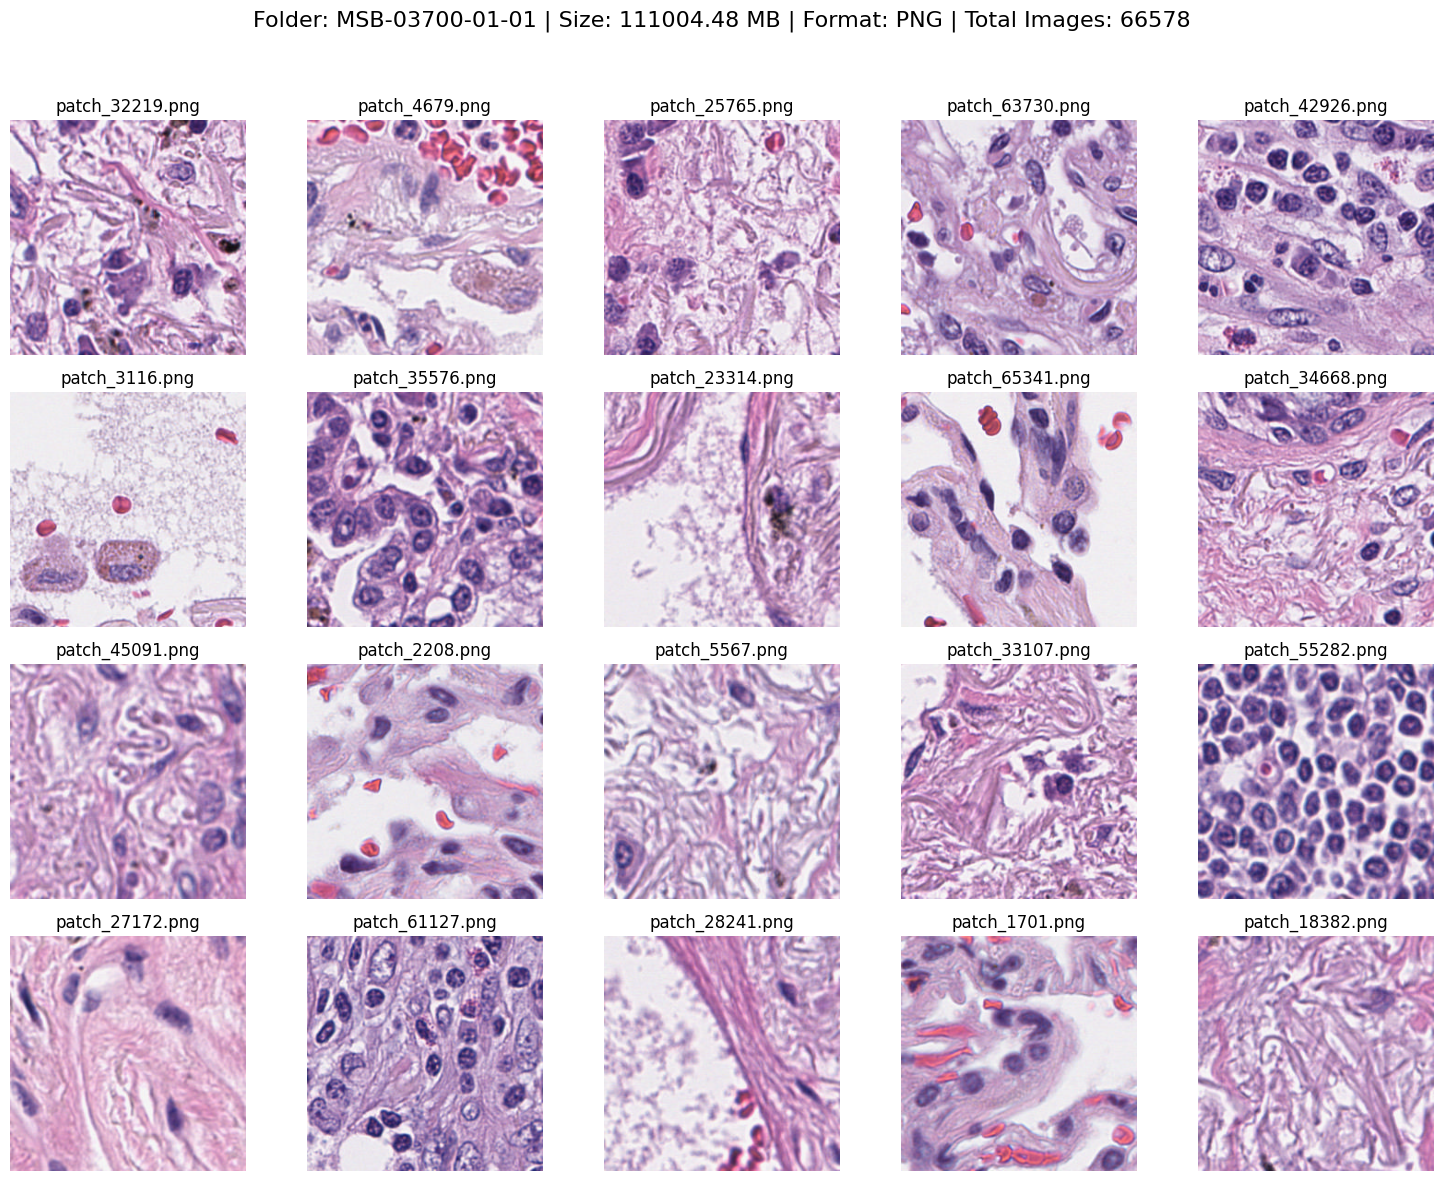

Saved preview image to: MSB-03700-01-01_preview.png


<Figure size 640x480 with 0 Axes>

In [ ]:
# PNG 텍스트 청크 제한 늘리기
PngImagePlugin.MAX_TEXT_CHUNK = 100 * 1024 * 1024  # 100MB

# 디렉토리명 추출
folder_name = os.path.basename(os.path.normpath(img_path))

# 이미지 파일 리스트
img_files = [f for f in os.listdir(img_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
total_imgs = len(img_files)
n_imgs = min(20, total_imgs)

# 디렉토리 용량 계산 (Bytes → MB)
def get_dir_size(path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            if os.path.isfile(fp):
                total_size += os.path.getsize(fp)
    return total_size

dir_size_bytes = get_dir_size(img_path)
dir_size_mb = dir_size_bytes / (1024 * 1024)

# subplot 그리드 설정
cols = 5
rows = (n_imgs + cols - 1) // cols

plt.figure(figsize=(15, 3 * rows))

for i in range(n_imgs):
    img_file = img_files[i]
    img = Image.open(os.path.join(img_path, img_file))

    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{img_file}')

# 제목: 폴더명, 폴더 용량(MB), 이미지 형식
plt.suptitle(
    f'Folder: {folder_name} | Size: {dir_size_mb:.2f} MB | Format: PNG | Total Images: {total_imgs}',
    fontsize=16
)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목 공간 확보
plt.show()

# 결과 저장 (PNG)
output_path = f'{folder_name}_preview.png'
plt.savefig(output_path, dpi=300)
print(f'Saved preview image to: {output_path}')
